[*********************100%***********************]  1 of 1 completed

price Ticker      DOGE-USD
Date                
2021-12-01  0.209487
2021-12-02  0.209726
2021-12-03  0.199993
2021-12-04  0.178853
2021-12-05  0.171255
...              ...
2023-10-27  0.067881
2023-10-28  0.069001
2023-10-29  0.069359
2023-10-30  0.069650
2023-10-31  0.068277

[700 rows x 1 columns]


<Axes: title={'center': 'DOGE differenced price'}, xlabel='Date'>

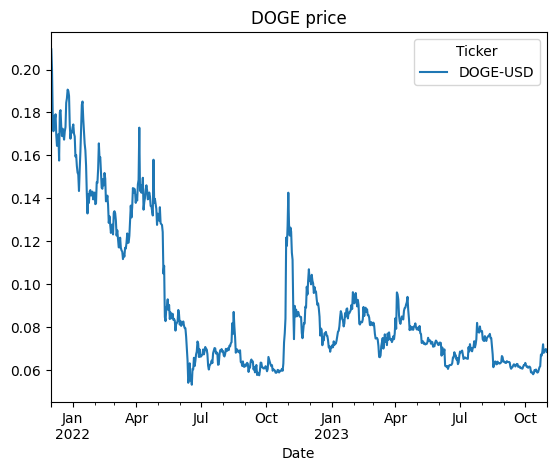

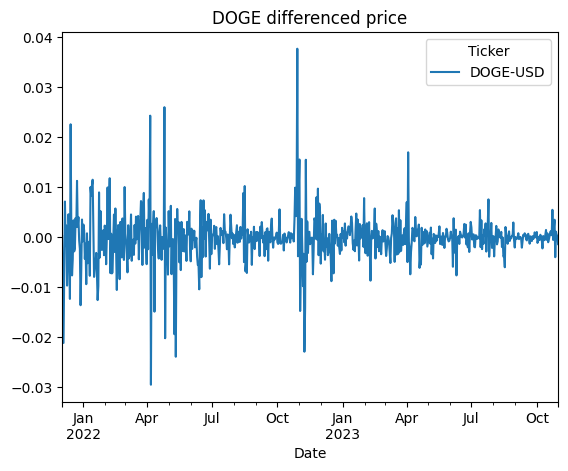

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import jarque_bera
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from scipy.stats import chi2
from arch import arch_model
from statsmodels.stats.diagnostic import het_arch
from arch import arch_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

data = yf.download("DOGE-USD", start="2021-12-01", end="2023-11-01")
price=data['Close']
print('price',price)
price.plot(title='DOGE price')
returns = 100 * price.pct_change().dropna()
diff = price.diff() .dropna()
diff.plot(title="DOGE differenced price")

In [ ]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 9.5 MB/s eta 0:00:00


<Axes: title={'center': 'DOGE  percentage return'}, xlabel='Date'>

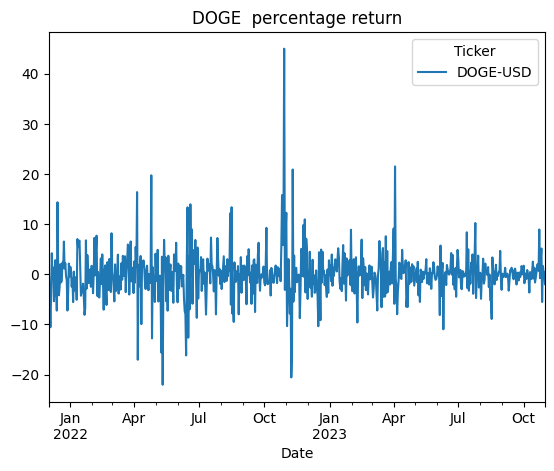

In [ ]:
returns.plot(title="DOGE  percentage return")

In [ ]:
# Calculate statistical parameters
mean = price.mean()
median = price.median()
maximum = price.max()
minimum = price.min()
std_dev = price.std()
skewness = price.skew()
kurtosis = price.kurtosis()

# Perform the Jarque-Bera test
jb_stat, jb_p_value = jarque_bera(price)

# Sum and sum of squared deviations
sum_price = price.sum()
sum_sq_dev = ((price - mean) ** 2).sum()

# Number of observations
observations = len(price)

# Create a DataFrame for the table
table = pd.DataFrame({
    'Statistic': [
        'Mean', 'Median', 'Maximum', 'Minimum', 'Std. dev.',
        'Skewness', 'Kurtosis', 'Jarque-Bera', 'Probability',
        'Sum', 'Sum Sq. dev.', 'Observations'
    ],
    'Price': [
        mean, median, maximum, minimum, std_dev,
        skewness, kurtosis, jb_stat, jb_p_value,
        sum_price, sum_sq_dev, observations
    ]
})

# Display a clean table
print(table.to_string(index=False))

   Statistic                                       Price
        Mean  Ticker
DOGE-USD    0.090638
dtype: float64
      Median  Ticker
DOGE-USD    0.076609
dtype: float64
     Maximum  Ticker
DOGE-USD    0.209726
dtype: float64
     Minimum  Ticker
DOGE-USD    0.053012
dtype: float64
   Std. dev.  Ticker
DOGE-USD    0.034476
dtype: float64
    Skewness  Ticker
DOGE-USD    1.305805
dtype: float64
    Kurtosis  Ticker
DOGE-USD    0.598668
dtype: float64
 Jarque-Bera                                  208.089654
 Probability                                         0.0
         Sum Ticker
DOGE-USD    63.446734
dtype: float64
Sum Sq. dev.  Ticker
DOGE-USD    0.830822
dtype: float64
Observations                                         700


In [ ]:
# Calculate statistical parameters
mean = returns.mean()
median = returns.median()
maximum = returns.max()
minimum = returns.min()
std_dev = returns.std()
skewness = returns.skew()
kurtosis = returns.kurtosis()

# Perform the Jarque-Bera test
jb_stat, jb_p_value = jarque_bera(returns)

# Sum and sum of squared deviations
sum_returns = returns.sum()
sum_sq_dev = ((returns - mean) ** 2).sum()

# Number of observations
observations = len(returns)

# Create a DataFrame for the table
table = pd.DataFrame({
    'Statistic': [
        'Mean', 'Median', 'Maximum', 'Minimum', 'Std. dev.',
        'Skewness', 'Kurtosis', 'Jarque-Bera', 'Probability',
        'Sum', 'Sum Sq. dev.', 'Observations'
    ],
    'returns': [
        mean, median, maximum, minimum, std_dev,
        skewness, kurtosis, jb_stat, jb_p_value,
        sum_returns, sum_sq_dev, observations
    ]
})

# Display a clean table
print(table.to_string(index=False))

   Statistic                                        returns
        Mean     Ticker
DOGE-USD   -0.053578
dtype: float64
      Median     Ticker
DOGE-USD   -0.053443
dtype: float64
     Maximum    Ticker
DOGE-USD    44.943197
dtype: float64
     Minimum    Ticker
DOGE-USD   -22.028628
dtype: float64
   Std. dev.     Ticker
DOGE-USD    4.681343
dtype: float64
    Skewness     Ticker
DOGE-USD    1.333395
dtype: float64
    Kurtosis    Ticker
DOGE-USD    15.300767
dtype: float64
 Jarque-Bera                                    6920.209518
 Probability                                            0.0
         Sum    Ticker
DOGE-USD   -37.451026
dtype: float64
Sum Sq. dev. Ticker
DOGE-USD    15296.651067
dtype: float64
Observations                                            699


check stationary :PRICE has a unit root

In [ ]:

adf_test = adfuller(price)

results_table = {
    "ADF Statistic of prices": adf_test[0],
    "p-value": adf_test[1].round(3),
    "1% Critical Value": adf_test[4]['1%'],
    "5% Critical Value": adf_test[4]['5%'],
    "10% Critical Value": adf_test[4]['10%']
}

for key, value in results_table.items():
    print(f"{key}: {value}")
p_value= adf_test[1].round(3)
if p_value > 0.05:
    print("Series is non-stationary so apply differencing ( or use returns).")
    series = returns
else:
    print("Series is stationary.")
    series = price

ADF Statistic of prices: -2.517224736364112
p-value: 0.111
1% Critical Value: -3.439960610754265
5% Critical Value: -2.8657809735786244
10% Critical Value: -2.5690284373908066
Series is non-stationary so apply differencing ( or use returns).


In [ ]:
adf_test = adfuller(returns)

# Display the results
results_table = {
    "ADF Statistic of returns": adf_test[0],
    "p-value": adf_test[1].round(3),
    "1% Critical Value": adf_test[4]['1%'],
    "5% Critical Value": adf_test[4]['5%'],
    "10% Critical Value": adf_test[4]['10%']
}

for key, value in results_table.items():
    print(f"{key}: {value}")

ADF Statistic of returns: -7.707208313285913
p-value: 0.0
1% Critical Value: -3.439960610754265
5% Critical Value: -2.8657809735786244
10% Critical Value: -2.5690284373908066


\ACF/PACF Table:
 Lags(k)      AC     PAC   Q-stat   Prob
       1 -0.0881 -0.0881   5.4476 0.0196
       2  0.1101  0.1032  13.9731 0.0009
       3  0.0757  0.0953  18.0123 0.0004
       4 -0.0251 -0.0228  18.4580 0.0010
       5 -0.0339 -0.0586  19.2707 0.0017
       6  0.0305  0.0215  19.9290 0.0029
       7 -0.0375 -0.0184  20.9226 0.0039
       8 -0.1356 -0.1441  33.9522 0.0000
       9  0.0735  0.0517  37.7896 0.0000
      10 -0.1210 -0.0761  48.1983 0.0000
      11 -0.0237 -0.0332  48.5970 0.0000
      12  0.0862  0.0890  53.9006 0.0000
      13 -0.0143  0.0178  54.0472 0.0000
      14 -0.1051 -0.1237  61.9527 0.0000
      15  0.1031  0.0567  69.5622 0.0000
      16 -0.1211 -0.0943  80.0831 0.0000
      17 -0.0122 -0.0182  80.1903 0.0000
      18  0.0293  0.0022  80.8090 0.0000
      19 -0.0971 -0.0761  87.6059 0.0000
      20  0.0118  0.0197  87.7060 0.0000
      21 -0.0582 -0.0759  90.1551 0.0000
      22  0.0121  0.0089  90.2609 0.0000
      23 -0.0599 -0.0191  92.8585 0.0000

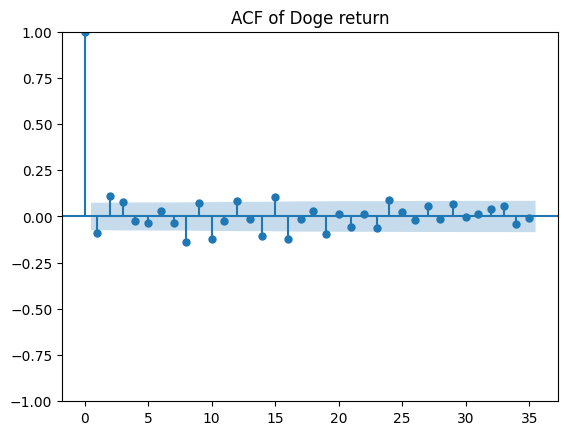

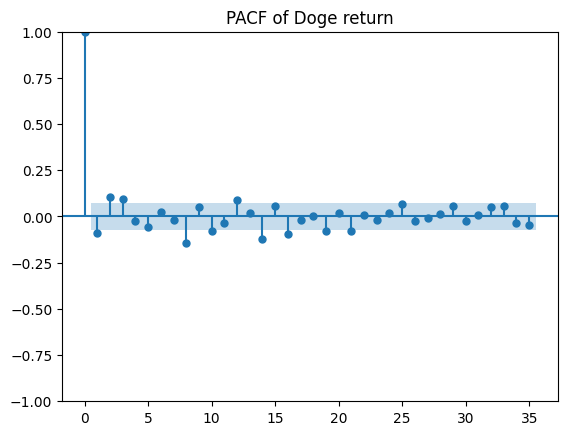

In [ ]:
nlags = 35
# Compute ACF and PACF
acf_values, confint = acf(series, nlags=nlags, alpha=0.05, fft=False, qstat=False)
pacf_values = pacf(series, nlags=nlags, method='ywm')

# Ljung-Box test for Q-statistics and p-values
ljungbox_results = acorr_ljungbox(series, lags=nlags, return_df=True)

# Create DataFrame (mimic Table 4)
table = pd.DataFrame({
    'Lags(k)': range(1, nlags+1),
    'AC': acf_values[1:nlags+1],
    'PAC': pacf_values[1:nlags+1],
    'Q-stat': ljungbox_results['lb_stat'],
    'Prob': ljungbox_results['lb_pvalue']
})

# Round values for cleaner output
table = table.round(4)

# Display table
print("\ACF/PACF Table:")
print(table.to_string(index=False))

# Plot ACF and PACF
plot_acf(series, lags=nlags, title='ACF of Doge return')
plot_pacf(series, lags=nlags, title='PACF of Doge return', method='ywm')
plt.show()


In [ ]:
# Define parameter combinations
p_values = [3,8,10,14,15,16]
q_values = [3,8,10,14,15,16]
results = []

# Fit models and calculate AIC
for p in p_values:
    for q in q_values:
        try:
            model = ARIMA(series, order=(p, 0, q))
            result = model.fit()
            results.append({'p': p, 'q': q, 'AIC': round(result.aic, 3)})
        except:
            results.append({'p': p, 'q': q, 'AIC': None})

# Create sorted results table
results_df = pd.DataFrame(results)
results_table = results_df.sort_values('AIC').reset_index(drop=True)

print("ARIMA Model Comparison (d=1):")
print(results_table.to_string(index=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

ARIMA Model Comparison (d=1):
 p  q      AIC
16 15 4099.573
10 16 4100.132
 8 14 4101.548
 8 16 4102.133
10 14 4102.657
16 16 4102.931
16 14 4103.101
15  3 4103.466
14  3 4103.792
10 15 4105.856
14 16 4106.130
 8 15 4106.320
16  3 4106.488
 3 10 4106.686
15 16 4107.880
14 14 4109.942
 3 14 4110.433
 8  3 4111.204
 3 16 4111.372
16 10 4111.495
15  8 4111.608
14  8 4111.767
15 14 4111.932
 3 15 4112.236
 3  8 4112.739
16  8 4113.035
14 10 4113.822
 8  8 4114.212
10 10 4114.228
10  3 4115.750
15 15 4116.490
 8 10 4116.536
14 15 4116.937
10  8 4117.091
15 10 4123.264
 3  3 4125.125


In [ ]:
# Define parameter combinations
p_values = [2,3,8,14,15,16]
q_values = [2,3,8,10,14,15,16]
results = []

# Fit models and calculate AICC
for p in p_values:
    for q in q_values:
        try:
            model = ARIMA(series, order=(p, 0, q))
            result = model.fit()
            results.append({'p': p, 'q': q, 'AICC': round(result.aicc, 3)})
        except:
            results.append({'p': p, 'q': q, 'AICC': None})

# Create sorted results table
results_df = pd.DataFrame(results)
results_table = results_df.sort_values('AICC').reset_index(drop=True)

print("ARIMA Model Comparison (d=1):")
print(results_table.to_string(index=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

ARIMA Model Comparison (d=1):
 p  q     AICC
16 15 4102.948
 8 14 4103.328
 8 16 4104.223
15  3 4104.705
14  3 4104.911
16 14 4106.273
16 16 4106.515
 2 10 4106.673
 3 10 4107.389
16  3 4107.852
 8 15 4108.251
 2 16 4108.525
14 16 4109.302
 2 14 4109.817
16  2 4110.419
 2 15 4110.984
14  2 4111.226
15 16 4111.254
15  2 4111.487
 3 14 4111.553
 8  3 4111.735
14 14 4112.726
 3 16 4112.737
 3  8 4113.270
 3 15 4113.475
15  8 4113.540
14  8 4113.547
16 10 4113.919
 2  8 4114.286
15 14 4114.907
16  8 4115.124
 8  8 4115.218
14 10 4115.912
 8 10 4117.775
15 15 4119.661
14 15 4119.912
 8  2 4124.341
 3  3 4125.333
15 10 4125.517
 3  2 4125.572
 2  3 4125.644
 2  2 4132.604


In [ ]:
# Fit ARIMA(16,1,15) WITH DRIFT (trend='t')
model = ARIMA(returns, order=(16,0, 15), trend='c')  # Critical fix: trend='t'
arima_result = model.fit()

# Extract parameters
params = arima_result.params          # Coefficients (drift, AR.L1-6, MA.L1-6)
stderr = arima_result.bse             # Standard errors
tstats = arima_result.tvalues         # t-statistics
pvalues = arima_result.pvalues        # p-values
sigmasq = np.var(arima_result.resid)  # Residual variance (SIGMASQ)

# Model fit statistics
AIC = arima_result.aic
BIC= arima_result.bic
log_likelihood = arima_result.llf
print("AIC ARIMA(16,1,15):",AIC)
print("BIC ARIMA(16,1,15):",BIC)
print("log_likelihood:",log_likelihood)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

AIC ARIMA(16,1,15): 4099.57310429001
BIC ARIMA(16,1,15): 4249.711578783726
log_likelihood: -2016.786552145005


In [ ]:
residuals = arima_result.resid.dropna()
nlags =25
# Perform ARCH-LM test

lm_stat, lm_pval, F_stat, F_pval = het_arch(residuals, nlags=nlags)

# Create results table
results = pd.DataFrame({
    'Statistic': ['ARCH-LM Test Statistic', 'LM p-value', 'F-statistic', 'F p-value'],
    'Value': [lm_stat, lm_pval, F_stat, F_pval]
}).round(4)


print("ARCH Test Results")
print(results.to_string(index=False))

# Interpretation: Check p-values
if lm_pval > 0.05:
    print("\nFail to reject the null hypothesis: No significant ARCH effects.")
else:
    print("\nReject the null hypothesis: Significant ARCH effects detected.")


ARCH Test Results
             Statistic   Value
ARCH-LM Test Statistic 44.7657
            LM p-value  0.0089
           F-statistic  1.8440
             F p-value  0.0077

Reject the null hypothesis: Significant ARCH effects detected.


In [ ]:
# Fit GARCH(1,1) on residuals
model_garch = arch_model(residuals, vol='GARCH',dist='skewt', p=1, q=1)
result_garch = model_garch.fit()


print("ARIMA(16,1,15) Coefficients:")
print(params.round(3))

print("\nGARCH(1,1) Coefficients:")
print(result_garch.params.round(3))


Iteration:      1,   Func. Count:      8,   Neg. LLF: 5545.832538095733
Iteration:      2,   Func. Count:     17,   Neg. LLF: 3078.9309216645333
Iteration:      3,   Func. Count:     26,   Neg. LLF: 16570.234577174284
Iteration:      4,   Func. Count:     35,   Neg. LLF: 2601.9093324667724
Iteration:      5,   Func. Count:     43,   Neg. LLF: 2531.946550990503
Iteration:      6,   Func. Count:     51,   Neg. LLF: 1921.90517330646
Iteration:      7,   Func. Count:     59,   Neg. LLF: 1914.12937501189
Iteration:      8,   Func. Count:     67,   Neg. LLF: 1910.9269228193862
Iteration:      9,   Func. Count:     75,   Neg. LLF: 1910.4454937260477
Iteration:     10,   Func. Count:     82,   Neg. LLF: 1910.4415670780686
Iteration:     11,   Func. Count:     89,   Neg. LLF: 1910.4415533859235
Iteration:     12,   Func. Count:     97,   Neg. LLF: 1910.441269653959
Iteration:     13,   Func. Count:    104,   Neg. LLF: 1910.4412670029142
Iteration:     14,   Func. Count:    110,   Neg. LLF: 1910

In [ ]:
def garch_se(garch_result):
    # Extract the covariance matrix of the parameters
    covariance_matrix = garch_result.param_cov

    # Calculate standard errors as the square root of the diagonal elements
    std_errors = np.sqrt(np.diag(covariance_matrix))

    # Create a pandas Series with parameter names for better readability
    std_errors_series = pd.Series(std_errors, index=garch_result.params.index)

    return std_errors_series


In [ ]:

# Extract all ARIMA coefficients and their statistics
arima_params = arima_result.params
arima_se = arima_result.bse  # Standard errors
arima_z = arima_result.tvalues  # z-statistics
arima_p = arima_result.pvalues  # p-values

# Extract all GARCH coefficients and their statistics
garch_params = result_garch.params
garch_se = garch_se(result_garch)
garch_z = result_garch.tvalues
garch_p = result_garch.pvalues

# Combine ARIMA and GARCH results into a single table
data = {
    'Variable': list(arima_params.index) + list(garch_params.index),
    'Coefficient': list(arima_params.values) + list(garch_params.values),
    'Std. Error': list(arima_se.values) + list(garch_se.values),
    'z-statistic': list(arima_z.values) + list(garch_z.values),
    'Prob.': list(arima_p.values) + list(garch_p.values),
}

# Create the DataFrame
results_table = pd.DataFrame(data)

# Round values for better readability
results_table[['Coefficient', 'Std. Error', 'z-statistic', 'Prob.']] = results_table[
    ['Coefficient', 'Std. Error', 'z-statistic', 'Prob.']
].round(4)

# Display the full results table
print(results_table)



    Variable  Coefficient  Std. Error  z-statistic   Prob.
0      const      -0.0527      0.1526      -0.3453  0.7299
1      ar.L1       0.1043      0.1456       0.7164  0.4737
2      ar.L2       0.2515      0.1172       2.1452  0.0319
3      ar.L3       0.2779      0.0878       3.1667  0.0015
4      ar.L4       0.1687      0.1048       1.6095  0.1075
5      ar.L5       0.1050      0.0988       1.0632  0.2877
6      ar.L6      -0.1275      0.0981      -1.2993  0.1938
7      ar.L7      -0.0217      0.0985      -0.2202  0.8257
8      ar.L8      -0.4147      0.0855      -4.8532  0.0000
9      ar.L9      -0.1092      0.0977      -1.1182  0.2635
10    ar.L10      -0.2779      0.0906      -3.0687  0.0021
11    ar.L11      -0.0476      0.1047      -0.4547  0.6493
12    ar.L12       0.1480      0.0937       1.5791  0.1143
13    ar.L13       0.3915      0.0842       4.6466  0.0000
14    ar.L14       0.2626      0.1086       2.4174  0.0156
15    ar.L15      -0.3613      0.1139      -3.1736  0.00

In [ ]:
# Model fit statistics
AIC = result_garch.aic
BIC= result_garch.bic
aic=arima_result.aic
bic=arima_result.bic
print("AIC ARIMA(16,1,15):", aic)
print("BIC ARIMA(16,1,15):",bic)
print("AIC ARIMA(16,1,15)-GARCH(1,1):",AIC)
print("BIC ARIMA(16,1,15)-GARCH(1,1) :",BIC)


AIC ARIMA(16,1,15): 4099.57310429001
BIC ARIMA(16,1,15): 4249.711578783726
AIC ARIMA(16,1,15)-GARCH(1,1): 3832.8825340058283
BIC ARIMA(16,1,15)-GARCH(1,1) : 3860.180438459231


In [ ]:
pip install arch

In [ ]:
# Calculate residuals
main_residual = result_garch.resid.dropna()

# Square the residuals
squared_residual = main_residual ** 2

# Calculate ACF and PACF values
lag_acf = acf(main_residual, nlags=35)
lag_pacf = pacf(main_residual, nlags=35)

# Calculate Q-statistics and p-values using the Ljung-Box test
ljungbox_results = acorr_ljungbox(main_residual, lags=35, return_df=True)

# Create the lag table
lag_table = pd.DataFrame({
    "Lag": np.arange(1, 36),
    "AC": lag_acf[1:],  # Skip the 0 lag
    "PAC": lag_pacf[1:],  # Skip the 0 lag
    "Q-stat": ljungbox_results['lb_stat'].values,
    "Prob": ljungbox_results['lb_pvalue'].values
})

print("ACF/PACF Table residual:")
print(lag_table)

ACF/PACF Table residual:
    Lag        AC       PAC     Q-stat      Prob
0     1  0.016233  0.016257   0.184993  0.667117
1     2  0.017371  0.017162   0.397140  0.819902
2     3 -0.002116 -0.002684   0.400291  0.940182
3     4 -0.017560 -0.017893   0.617681  0.961079
4     5  0.001109  0.001770   0.618549  0.987138
5     6  0.015349  0.016066   0.785123  0.992467
6     7  0.007911  0.007364   0.829440  0.997132
7     8  0.007544  0.006523   0.869793  0.998945
8     9  0.021745  0.021675   1.205596  0.998799
9    10 -0.015064 -0.015655   1.366988  0.999293
10   11 -0.016708 -0.017029   1.565809  0.999531
11   12  0.033061  0.034887   2.345411  0.998663
12   13  0.015177  0.015487   2.509934  0.999203
13   14 -0.007947 -0.010867   2.555114  0.999636
14   15 -0.016221 -0.018099   2.743606  0.999770
15   16  0.001928  0.004364   2.746273  0.999907
16   17  0.003880  0.005409   2.757087  0.999962
17   18  0.013486  0.012084   2.887957  0.999979
18   19 -0.044748 -0.047404   4.330877  0.99

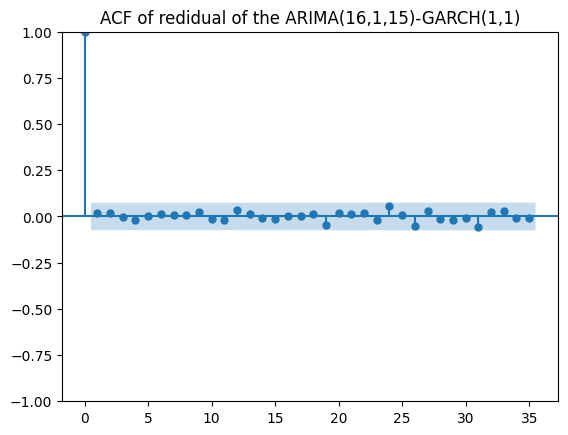

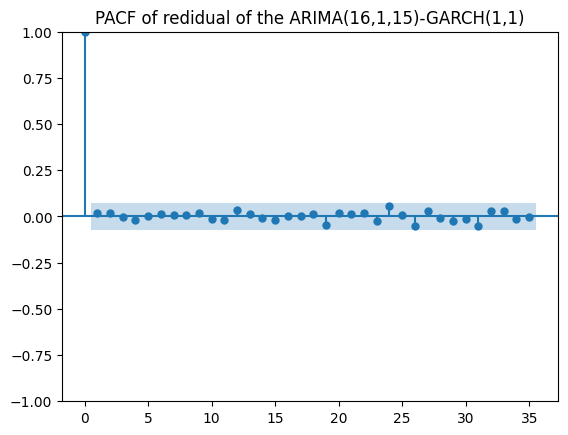

In [ ]:
# Plot ACF/PACF
plot_acf(main_residual, lags=nlags, title='ACF of redidual of the ARIMA(16,1,15)-GARCH(1,1)',alpha=0.05)
plot_pacf(main_residual, lags=nlags, title='PACF of redidual of the ARIMA(16,1,15)-GARCH(1,1)', method='ywm')
plt.show()

In [ ]:
# Ljung-Box test on squared standardized residuals
lb_test = acorr_ljungbox(main_residual, lags=[35], return_df=True)
print(f" Ljung-Box p-value: {lb_test['lb_pvalue'].values[0]:.4f}")

 Ljung-Box p-value: 0.9994


In [ ]:
# Perform ARCH-LM test

lm_stat, lm_pval, F_stat, F_pval = het_arch(squared_residual, nlags=30)

# Create results table
results = pd.DataFrame({
    'Statistic': ['ARCH-LM Test Statistic', 'LM p-value', 'F-statistic', 'F p-value'],
    'Value': [lm_stat, lm_pval, F_stat, F_pval]
}).round(4)


print("ARCH Test Results")
print(results.to_string(index=False))

# Interpretation: Check p-values
if lm_pval > 0.05:
    print("\nFail to reject the null hypothesis: No significant ARCH effects.")
else:
    print("\nReject the null hypothesis: Significant ARCH effects detected.")

ARCH Test Results
             Statistic  Value
ARCH-LM Test Statistic 1.3555
            LM p-value 1.0000
           F-statistic 0.0432
             F p-value 1.0000

Fail to reject the null hypothesis: No significant ARCH effects.


In [ ]:
pip install arch

compare forecasted prices with real **prices**

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/loc

         Date  Predicted Price
0  2023-11-18         0.068450
1  2023-11-19         0.067266
2  2023-11-20         0.066719
3  2023-11-21         0.067330
4  2023-11-22         0.066407
5  2023-11-23         0.065866
6  2023-11-24         0.066501
7  2023-11-25         0.065131
8  2023-11-26         0.064603
9  2023-11-27         0.065300
10 2023-11-28         0.063975
11 2023-11-29         0.064228
12 2023-11-30         0.064073
13 2023-12-01         0.063886


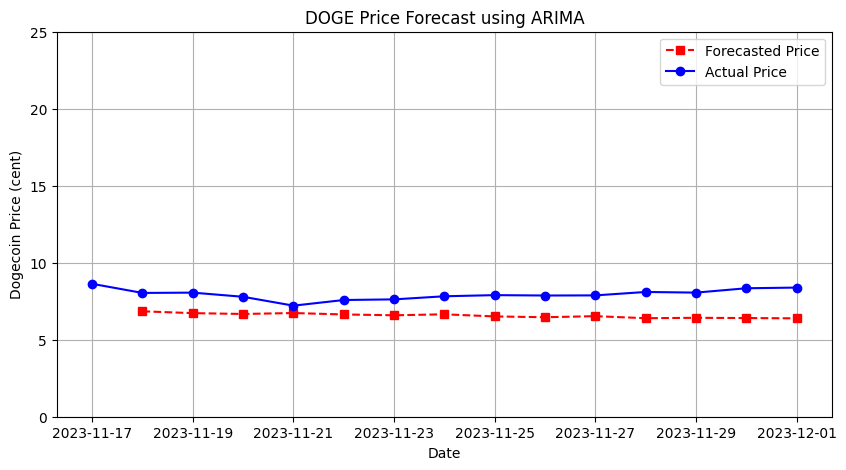

Ticker      DOGE-USD
Date                
2023-11-17  0.086304
2023-11-18  0.080383
2023-11-19  0.080576
2023-11-20  0.077879
2023-11-21  0.072119
2023-11-22  0.075784
2023-11-23  0.076200
2023-11-24  0.078217
2023-11-25  0.078955
2023-11-26  0.078704
2023-11-27  0.078788
2023-11-28  0.081009
2023-11-29  0.080593
2023-11-30  0.083417
2023-12-01  0.083857
RMSE: 0.01389
MAE: 0.01334
MAPE: %16.75911


In [ ]:
data = yf.download("DOGE-USD", start="2021-12-01", end="2023-11-01")
price = data['Close'].dropna()

# Convert prices to log returns for better stationarity
log_returns = np.log(price / price.shift(1)).dropna()

#Import test data
real_prices = yf.download("DOGE-USD", start="2023-11-17", end="2023-12-02")['Close']
real_log_returns = np.log(real_prices / real_prices.shift(1)).dropna()


#Fit ARIMA Model
model_arima = ARIMA(log_returns, order=(16, 0, 15))
arima_result = model_arima.fit()

#Forecast ARIMA Mean (Log Returns)
forecast_steps = len(real_log_returns)
arima_forecast = arima_result.forecast(steps=forecast_steps).values.flatten()


if len(arima_forecast) != forecast_steps:
    arima_forecast = np.resize(arima_forecast, forecast_steps)

# Compute Future Log Returns
predicted_log_returns = arima_forecast

# Ensure predicted_log_returns has the correct shape
if len(predicted_log_returns) != forecast_steps:
    predicted_log_returns = np.resize(predicted_log_returns, forecast_steps)


cumulative_log_returns = np.cumsum(predicted_log_returns)

# Convert log returns back to prices
last_price = price.iloc[-1].item()
predicted_prices = [last_price * np.exp(ret) for ret in cumulative_log_returns]

#Create DataFrame with Forecasted Prices
forecast_df = pd.DataFrame({
    "Date": pd.date_range(start="2023-11-18", periods=forecast_steps, freq="D"),
    "Predicted Price": predicted_prices
})

print(forecast_df)


plt.figure(figsize=(10, 5))
plt.plot(forecast_df["Date"], forecast_df["Predicted Price"]*100,marker="s",linestyle="--", label="Forecasted Price", color="red" )
plt.plot(real_prices.index, real_prices.values*100, marker="o", linestyle="-", label="Actual Price",color='blue' )
plt.xlabel("Date")
plt.ylabel("Dogecoin Price (cent)")
plt.title("DOGE Price Forecast using ARIMA")
plt.legend()
plt.ylim(0, 25)
plt.grid()
plt.show()
print(real_prices)
#Evaluate Model Accuracy (RMSE, MAE, MAPE)
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

mape = calculate_mape(real_prices[1:].values, predicted_prices)
rmse = np.sqrt(mean_squared_error(real_prices[1:].values, predicted_prices))
mae = mean_absolute_error(real_prices[1:].values, predicted_prices)

print(f"RMSE: {rmse:.5f}")
print(f"MAE: {mae:.5f}")
print(f"MAPE: %{mape:.5f}")

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001894. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


         Date  Predicted Price
0  2023-11-18         0.068557
1  2023-11-19         0.067341
2  2023-11-20         0.066941
3  2023-11-21         0.067918
4  2023-11-22         0.066931
5  2023-11-23         0.066328
6  2023-11-24         0.067367
7  2023-11-25         0.066173
8  2023-11-26         0.065517
9  2023-11-27         0.066365
10 2023-11-28         0.064899
11 2023-11-29         0.065034
12 2023-11-30         0.064940
13 2023-12-01         0.064247


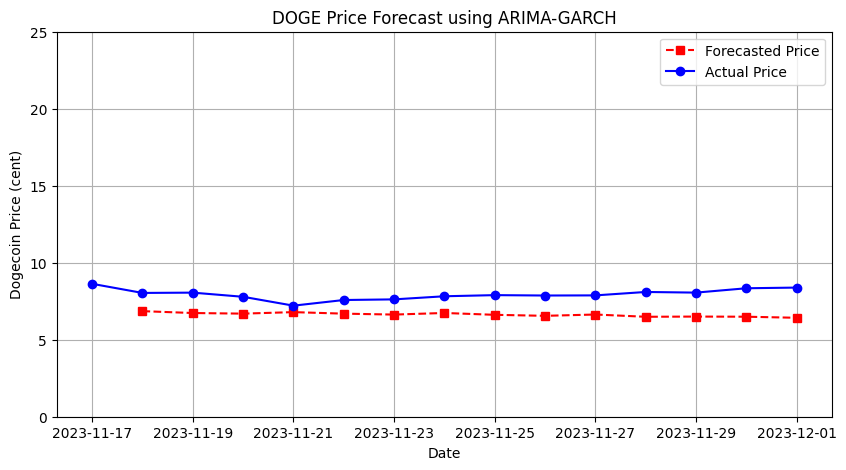

Ticker      DOGE-USD
Date                
2023-11-17  0.086304
2023-11-18  0.080383
2023-11-19  0.080576
2023-11-20  0.077879
2023-11-21  0.072119
2023-11-22  0.075784
2023-11-23  0.076200
2023-11-24  0.078217
2023-11-25  0.078955
2023-11-26  0.078704
2023-11-27  0.078788
2023-11-28  0.081009
2023-11-29  0.080593
2023-11-30  0.083417
2023-12-01  0.083857
RMSE: 0.01327
MAE: 0.01271
MAPE: %15.96060


In [ ]:

residuals = arima_result.resid.dropna()

# Fit GARCH(1,1) on ARIMA residuals
model_garch = arch_model(residuals, vol='GARCH', dist='skewt', p=1, q=1)
result_garch = model_garch.fit(disp="off")

#Forecast ARIMA Mean (Log Returns)
forecast_steps = len(real_log_returns)
arima_forecast = arima_result.forecast(steps=forecast_steps).values.flatten()

#Forecast GARCH Volatility
garch_forecast = result_garch.forecast(horizon=forecast_steps)
garch_variance = garch_forecast.variance.values[-1, :]
garch_volatility = np.sqrt(garch_variance)

if len(arima_forecast) != forecast_steps:
    arima_forecast = np.resize(arima_forecast, forecast_steps)

if len(garch_volatility) != forecast_steps:
    garch_volatility = np.resize(garch_volatility, forecast_steps)

np.random.seed(42)
random_shocks = np.random.normal(0, 0.1, forecast_steps)

# Compute Future Log Returns
predicted_log_returns = arima_forecast + garch_volatility * random_shocks

# Ensure predicted_log_returns has the correct shape
if len(predicted_log_returns) != forecast_steps:
    predicted_log_returns = np.resize(predicted_log_returns, forecast_steps)


cumulative_log_returns = np.cumsum(predicted_log_returns)

# Convert log returns back to prices
last_price = price.iloc[-1].item()
predicted_prices = [last_price * np.exp(ret) for ret in cumulative_log_returns]

#Create DataFrame with Forecasted Prices
forecast_df = pd.DataFrame({
    "Date": pd.date_range(start="2023-11-18", periods=forecast_steps, freq="D"),
    "Predicted Price": predicted_prices
})

print(forecast_df)


plt.figure(figsize=(10, 5))
plt.plot(forecast_df["Date"], forecast_df["Predicted Price"]*100,marker="s",linestyle="--", label="Forecasted Price", color="red" )
plt.plot(real_prices.index, real_prices.values*100, marker="o", linestyle="-", label="Actual Price",color='blue' )
plt.xlabel("Date")
plt.ylabel("Dogecoin Price (cent)")
plt.title("DOGE Price Forecast using ARIMA-GARCH")
plt.legend()
plt.ylim(0, 25)
plt.grid()
plt.show()
print(real_prices)
#Evaluate Model Accuracy (RMSE, MAE, MAPE)
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

mape = calculate_mape(real_prices[1:].values, predicted_prices)
rmse = np.sqrt(mean_squared_error(real_prices[1:].values, predicted_prices))
mae = mean_absolute_error(real_prices[1:].values, predicted_prices)

print(f"RMSE: {rmse:.5f}")
print(f"MAE: {mae:.5f}")
print(f"MAPE: %{mape:.5f}")